In [1]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)

weather = pd.read_csv(r'D:/Application/eclipse/workspace/COMSE6998PROJECT/PreProcessWeatherData/weather_processed_again/weather_2016_04.csv',index_col='Time')

D:\Application\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2882: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
weather.head()

,Temp,Weather,Wind,Humidity,Barometer,Visibility
Time,,,,,,
01 00:51,64,cloud,5,75,29.76,10
01 01:51,65,cloud,7,76,29.73,10
01 02:51,66,cloud,6,73,29.72,10
01 03:51,66,cloud,5,75,29.72,10
01 04:51,67,cloud,7,73,29.70,10


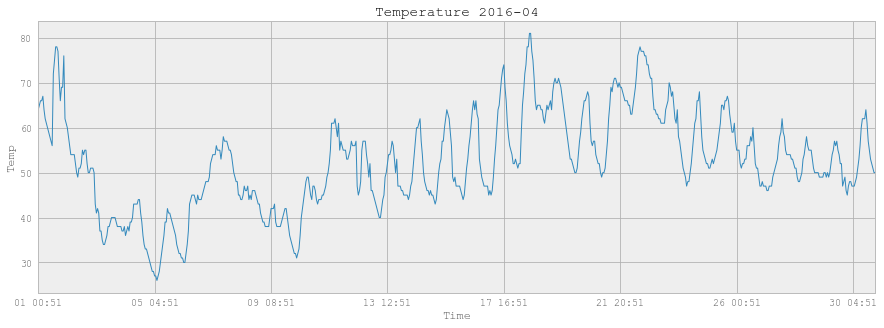

In [3]:
weather['Temp'].plot()
plt.ylabel('Temp')
plt.title('Temperature 2016-04') 

In [5]:
taxi = pd.read_csv(r'D:/Application/eclipse/workspace/COMSE6998PROJECT/PreProcessTaxiData/TaxiDataProcessed/cleanData_yellow_tripdata_2016-04.csv')

In [6]:
taxi.head()

,tpep_pickup_datetime,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,duration
0,2016-04-01 00:00:00,0.50,-73.977,40.758,-73.978,40.754,4.80,119.0
1,2016-04-01 00:00:00,2.20,-73.985,40.757,-73.989,40.733,13.55,727.0
2,2016-04-01 00:00:00,0.96,-73.979,40.759,-73.991,40.751,9.80,641.0
3,2016-04-01 00:00:00,1.54,-73.985,40.768,-73.991,40.751,11.76,630.0
4,2016-04-01 00:00:01,3.50,-73.973,40.757,-73.933,40.766,18.30,903.0


In [7]:
Time=taxi['tpep_pickup_datetime'].copy().str.slice(8,16)
Time.head()

0    01 00:00
1    01 00:00
2    01 00:00
3    01 00:00
4    01 00:00
Name: tpep_pickup_datetime, dtype: object

In [8]:
taxi['tpep_pickup_datetime']=Time.str.slice_replace(6,8,'51')

In [9]:
taxi.head()

,tpep_pickup_datetime,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,duration
0,01 00:51,0.50,-73.977,40.758,-73.978,40.754,4.80,119.0
1,01 00:51,2.20,-73.985,40.757,-73.989,40.733,13.55,727.0
2,01 00:51,0.96,-73.979,40.759,-73.991,40.751,9.80,641.0
3,01 00:51,1.54,-73.985,40.768,-73.991,40.751,11.76,630.0
4,01 00:51,3.50,-73.973,40.757,-73.933,40.766,18.30,903.0


In [10]:
# column name外面最好加中括号
taxiDate = taxi[['tpep_pickup_datetime']].copy()
taxiDate.head()

,tpep_pickup_datetime
0,01 00:51
1,01 00:51
2,01 00:51
3,01 00:51
4,01 00:51


In [11]:
countPickup = taxiDate['tpep_pickup_datetime'].value_counts()
countPickup.head()

29 19:51    28657
08 19:51    27616
15 19:51    27402
15 22:51    26892
16 19:51    26807
Name: tpep_pickup_datetime, dtype: int64

In [12]:
countPickup = countPickup.sort_index().to_frame()

In [13]:
countPickup.index.names=['Time']

In [14]:
countPickup[:5]

,tpep_pickup_datetime
Time,
01 00:51,15138
01 01:51,9830
01 02:51,6323
01 03:51,4476
01 04:51,3443


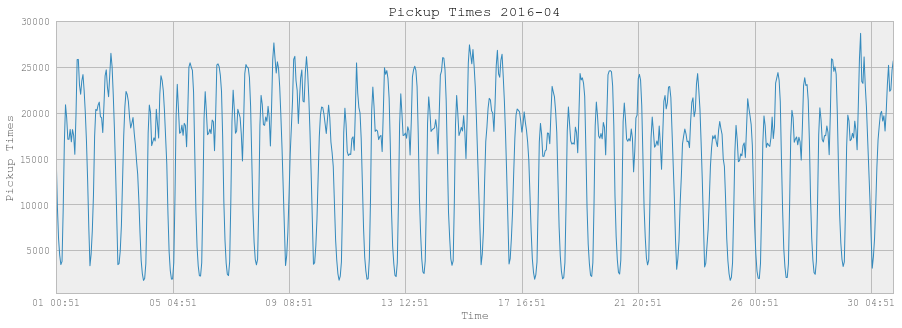

In [15]:
countPickup['tpep_pickup_datetime'].plot()
plt.ylabel('Pickup Times')
plt.title('Pickup Times 2016-04') 

In [16]:
print countPickup.shape
print weather[['Temp']].shape
countPickup[:5]

(720, 1)
(720, 1)


,tpep_pickup_datetime
Time,
01 00:51,15138
01 01:51,9830
01 02:51,6323
01 03:51,4476
01 04:51,3443


In [19]:
WeatherPickupTime = countPickup.join(weather[['Temp']]).join(weather[['Weather']])
weekWeatherPickupTime = WeatherPickupTime[:168].copy()

In [20]:
weekWeatherPickupTime[:5]

,tpep_pickup_datetime,Temp,Weather
Time,,,
01 00:51,15138,64,cloud
01 01:51,9830,65,cloud
01 02:51,6323,66,cloud
01 03:51,4476,66,cloud
01 04:51,3443,67,cloud


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000003D024A20>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000029C31438>], dtype=object)

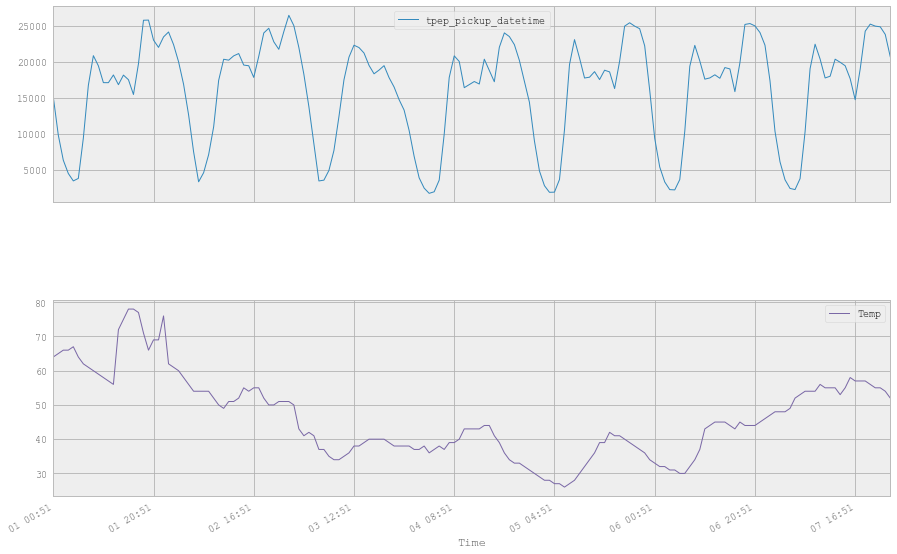

In [21]:
weekWeatherPickupTime.plot(subplots=True, figsize=(15, 10))

In [22]:
dayPickup = countPickup.groupby(countPickup.index.str.slice(0,2)).aggregate(sum)
dayPickup.head()

,tpep_pickup_datetime
Time,
01,393869
02,426997
03,372317
04,356777
05,381772


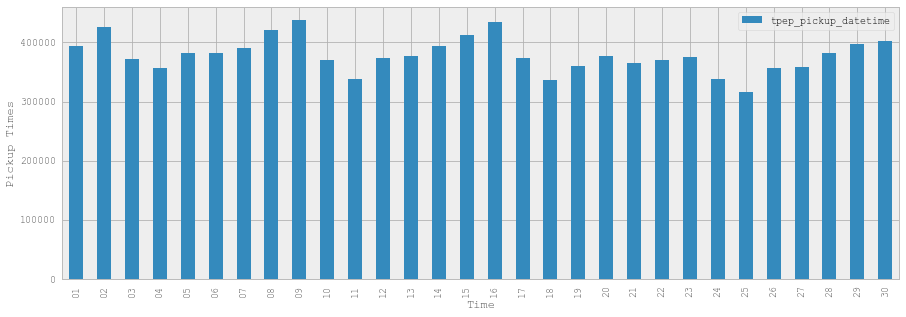

In [23]:
dayPickup.plot(kind='bar')
plt.ylabel('Pickup Times')